<a href="https://colab.research.google.com/github/YoshidaRyusei/MyResearch/blob/main/dailyid_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive #driveのモジュールをインポート
import pandas as pd

In [2]:
drive.mount('/content/drive') #driveのマウント

Mounted at /content/drive


In [ ]:
#空のDataframe作成
DF = pd.DataFrame(columns=['Time','num_ID'])

for i in range(1,32): #10/1～10/31
    num = f'{i:02}'  # 0埋めで2文字（f文字列：Python 3.6以降）
    input_path = "drive/My Drive/MyResearch/range_data/range10" + num + ".csv"
    df = pd.read_csv(input_path)

    for j in range(0,24): #24時間
        hours = f'{j:02}'  # 0埋めで2文字
        df2 = df.query("hour == @j")
        ID = df2['dailyid'].nunique()
        DF = DF.append({'Time': num + hours, 'num_ID': ID}, ignore_index=True) #行の追加

In [21]:
'''
#集計量出力
output_path = "drive/My Drive/basic_research/dailyid.csv"
DF.to_csv(output_path, index=True)
'''

In [25]:
!pip install japanize_matplotlib

import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


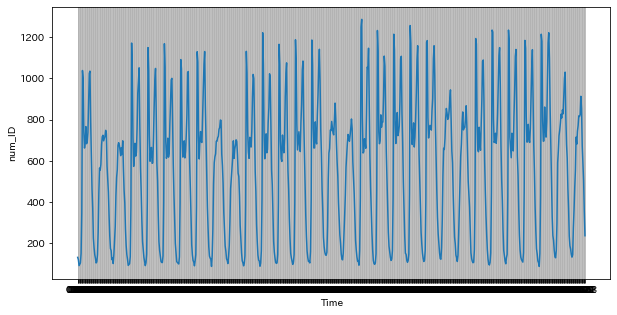

In [27]:
#可視化
plt.figure(figsize=(10, 5))
sns.lineplot(x=DF["Time"], y=DF["num_ID"])
plt.grid(axis="x")
plt.show()

In [44]:
##STL分解
period = 168
stl = STL(DF["num_ID"],period=period)
dr = stl.fit()

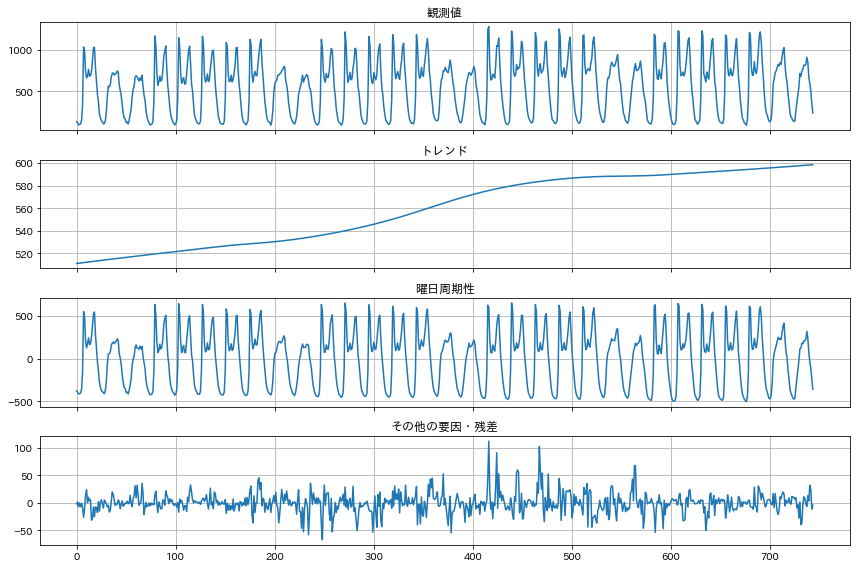

In [46]:
#トレンド・季節/周期性・残差に分解する
_, axes = plt.subplots(figsize=(12, 8), ncols=1, nrows=4, sharex=True)

axes[0].set_title("観測値")
axes[0].plot(dr.observed)
axes[0].grid()

axes[1].set_title("トレンド")
axes[1].plot(dr.trend)
axes[1].grid()

axes[2].set_title("曜日周期性")
axes[2].plot(dr.seasonal)
axes[2].grid()

axes[3].set_title("その他の要因・残差")
axes[3].plot(dr.resid)
axes[3].grid()

plt.tight_layout()
plt.show()


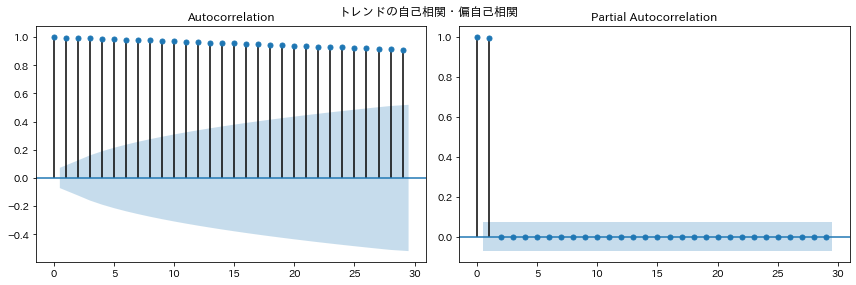

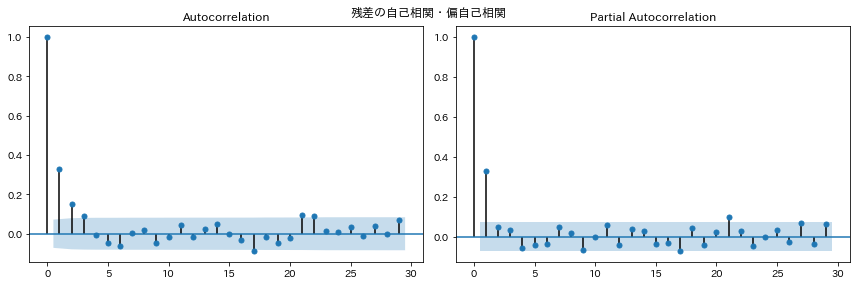

In [47]:
#トレンドを捉えることができているか確認する
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
plt.suptitle("トレンドの自己相関・偏自己相関")
plot_acf(dr.trend.dropna(), ax=axes[0])
plot_pacf(dr.trend.dropna(), method="ywm", ax=axes[1])
plt.tight_layout()
plt.show()

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
plt.suptitle("残差の自己相関・偏自己相関")
plot_acf(dr.resid.dropna(), ax=axes[0])
plot_pacf(dr.resid.dropna(), method="ywm", ax=axes[1])
plt.tight_layout()
plt.show()